# SUPERMARKET ANALYSIST
Created By Christian Vieri Darma Saputra

## INTRODUCTION
Within the realm of marketing and customer analytics lies a robust dataset, providing a snapshot of company's consumer landscape. This data encompasses various dimensions, including demographics, education, marital status, and financial profiles, detailing customer interactions, purchase behavior, and responses to marketing campaigns. With diverse attributes like birth year, age, education, and income levels, this dataset offers a prime opportunity for comprehensive analysis. Exploring temporal aspects, enrollment dates, and campaign responses provides insights into effectiveness. For data analysts, unraveling these patterns holds strategic potential—segmenting customers, understanding preferences, and identifying campaign influencers. This dataset promises a nuanced exploration of consumer behavior, aiming to optimize marketing strategies and elevate overall customer satisfaction, fostering the company's growth in a competitive market. The main objective of supermarket data analysist is to evaluate all aspect of supermarket business, from customer behavior & profile, products, promotion, sales channel.

## PROBLEM STATEMENT

Number of New Customer

Customer’s Recency Rate 

Range of Products’ Variance

Acceptance Rate of Campaign

Percentage of WebPurchases



In [145]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, time


from scipy.stats import shapiro, kstest
from scipy.stats import ttest_ind, ttest_1samp, ttest_rel, f_oneway
from scipy.stats import mannwhitneyu, kruskal, wilcoxon, normaltest

## Supermarket Customers Data Dictionary

From the displayed dataset, there are 22 columns along with their descriptions:

People

● ID: Kode Unik Per Customer

● Year_Birth: Tahun Lahir Customer

● Education: Tingkat Pendidikan Customer

● Marital_Status: Status Pernikahan Customer

● Income: Penghasilan Customer

● Kidhome: Jumlah Anak Kecil Dalam Keluarga

● Teenhome: Jumlah Remaja Kecil Dalam Keluarga

● Dt_Customer: Tanggal Customer Terdaftar Sebagai Member Super market

● Recency: Jumlah Hari Di Hitung Dari Terakhir Kali Customer Berbelanja

● Complain: 1 Jika Customer Complain Dalam 2 Tahun Terakhir, 0 Sebaliknya


Products

● MntWines: Jumlah Wine Yang Di Beli Dalam 2 Tahun Terakhir

● MntFruits:Jumlah Fruits Yang Di Beli Dalam 2 Tahun Terakhir

● MntMeatProducts: Jumlah Meat Products Yang Di Beli Dalam 2 Tahun Terakhir

● MntFishProducts: Jumlah Fish Products Yang Di Beli Dalam 2 Tahun Terakhir

● MntSweetProducts: Jumlah Sweet Products Yang Di Beli Dalam 2 Tahun Terakhir

● MntGoldProds: Jumlah Emas Yang Di Beli Dalam 2 Tahun Terakhir


Promotion


● NumDealsPurchases: Jumlah Pembelian Yang Terjadi Dengan Diskon

● AcceptedCmp1: 1 Jika Customer Mengambil Penawaran Saat Campaign Pertama, 0 Sebaliknya

● AcceptedCmp2: 1 Jika Customer Mengambil Penawaran Saat Campaign Kedua, 0 Sebaliknya

● AcceptedCmp3: 1 Jika Customer Mengambil Penawaran Saat Campaign Ketiga, 0 Sebaliknya

● AcceptedCmp4: 1 Jika Customer Mengambil Penawaran Saat Campaign Keempat, 0 Sebaliknya

● AcceptedCmp5: 1 Jika Customer Mengambil Penawaran Saat Campaign Kelima, 0 Sebaliknya

● Response: 1 Jika Customer Mengambil Penawaran Saat Campaign Terakhir, 0 Sebaliknya


Place

● NumWebPurchases: Jumlah Pembelian Melalui Website Perusahaan

● NumCatalogPurchases: Jumlah Pembelian Melalui Katalog

● NumStorePurchases: Jumlah Pembelian Langsung Di Toko

● NumWebVisitsMonth: Jumlah Kunjungan Website Pada Bulan Lalu

In [146]:
sp = pd.DataFrame(pd.read_csv('Supermarket Customers.csv', sep=';'))
sp

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Graduation,Married,61223.0,0,1,13/06/2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,PhD,Together,64014.0,2,1,10/06/2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,Master,Together,69245.0,0,1,24/01/2014,8,...,3,0,0,0,0,0,0,3,11,0


## DATA UNDERSTANDING

In [147]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Age                  2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntWines             2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

With the majority of data types being integers, it would be advisable to perform a data describe.

In [148]:
sp.describe()

,ID,Year_Birth,Age,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,45.194196,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,18.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,37.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,44.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,55.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,121.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## DATA CLEANING

The next step is to determine if there are columns with missing data. Columns with missing data will be displayed if the percentage of missing values is above 0%

In [149]:
nullvalue = sp.isna().sum()/len(sp)*100
nullvalue
# BERPENGARUH ATAU TIDAK?, Maksimal 5%

ID                     0.000000
Year_Birth             0.000000
Age                    0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [150]:
nullvalue = sp.isna().sum()/len(sp)*100
nullvalue[nullvalue!=0]
# BERPENGARUH ATAU TIDAK?, optimalnya 5%

Income    1.071429
dtype: float64

## MATRIX OF MISSING DATA

In [151]:
spclean = sp[sp['Income'].notna()]
spclean

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Graduation,Married,61223.0,0,1,13/06/2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,PhD,Together,64014.0,2,1,10/06/2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,Master,Together,69245.0,0,1,24/01/2014,8,...,3,0,0,0,0,0,0,3,11,0


In [152]:
spcdesc = spclean['Income'].describe()
spcdesc

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

Q1

Q3 

Interquartile Range (IQR)= Q3 - Q1

Batas Bawah = Q1 - 1.5 * IQR

Batas Atas = Q3 + 1.5 * IQR

In [153]:
q3 = spcdesc['75%']
q1 = spcdesc['25%']
iqr = q3-q1
bb = q1-(1.5*iqr)
ba = q3+(1.5*iqr)

print(q3)
print(q1)
print(iqr)
print(bb)
print(ba)

68522.0
35303.0
33219.0
-14525.5
118350.5


In [154]:
spclean = spclean[(spclean['Income']>=10000) & (spclean['Age']>=18)]
spclean

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,47,Graduation,Married,61223.0,0,1,13/06/2013,46,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,68,PhD,Together,64014.0,2,1,10/06/2014,56,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,33,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,58,Master,Together,69245.0,0,1,24/01/2014,8,...,3,0,0,0,0,0,0,3,11,0


In [155]:
spclean = spclean.reset_index()
spclean = spclean.drop("index", axis=1, inplace=False)
spclean

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,Graduation,Single,58138.0,0,0,04/09/2012,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,Graduation,Single,46344.0,1,1,08/03/2014,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,Graduation,Together,71613.0,0,0,21/08/2013,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,Graduation,Together,26646.0,1,0,10/02/2014,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,PhD,Married,58293.0,1,0,19/01/2014,94,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,Graduation,Married,61223.0,0,1,13/06/2013,46,...,5,0,0,0,0,0,0,3,11,0
2183,4001,1946,68,PhD,Together,64014.0,2,1,10/06/2014,56,...,7,0,0,0,1,0,0,3,11,0
2184,7270,1981,33,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,6,0,1,0,0,0,0,3,11,0
2185,8235,1956,58,Master,Together,69245.0,0,1,24/01/2014,8,...,3,0,0,0,0,0,0,3,11,0


In [156]:
spclean.isna().sum()

ID                     0
Year_Birth             0
Age                    0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [157]:
conditions = [
    (spclean['Age'] >= 18) & (spclean['Age'] <= 24),
    (spclean['Age'] >= 25) & (spclean['Age'] <= 34),
    (spclean['Age'] >= 35) & (spclean['Age'] <= 44),
    (spclean['Age'] >= 45) & (spclean['Age'] <= 54),
    (spclean['Age'] >= 55) & (spclean['Age'] <= 64),
    (spclean['Age'] >= 65)
]

labels = ['18-24 y.o.', '25-34 y.o.', '35-44 y.o.', '45-54 y.o.', '55-64 y.o.', '65+ y.o.']

spclean['AgeGroup'] = np.select(conditions, labels, default='Unknown')

In [158]:
spclean

,ID,Year_Birth,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,AgeGroup
0,5524,1957,57,Graduation,Single,58138.0,0,0,04/09/2012,58,...,0,0,0,0,0,0,3,11,1,55-64 y.o.
1,2174,1954,60,Graduation,Single,46344.0,1,1,08/03/2014,38,...,0,0,0,0,0,0,3,11,0,55-64 y.o.
2,4141,1965,49,Graduation,Together,71613.0,0,0,21/08/2013,26,...,0,0,0,0,0,0,3,11,0,45-54 y.o.
3,6182,1984,30,Graduation,Together,26646.0,1,0,10/02/2014,26,...,0,0,0,0,0,0,3,11,0,25-34 y.o.
4,5324,1981,33,PhD,Married,58293.0,1,0,19/01/2014,94,...,0,0,0,0,0,0,3,11,0,25-34 y.o.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,Graduation,Married,61223.0,0,1,13/06/2013,46,...,0,0,0,0,0,0,3,11,0,45-54 y.o.
2183,4001,1946,68,PhD,Together,64014.0,2,1,10/06/2014,56,...,0,0,0,1,0,0,3,11,0,65+ y.o.
2184,7270,1981,33,Graduation,Divorced,56981.0,0,0,25/01/2014,91,...,0,1,0,0,0,0,3,11,0,25-34 y.o.
2185,8235,1956,58,Master,Together,69245.0,0,1,24/01/2014,8,...,0,0,0,0,0,0,3,11,0,55-64 y.o.


In [159]:
spclean.insert(3, 'AgeGroup', spclean.pop('AgeGroup'))

spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,0,0,04/09/2012,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,1,1,08/03/2014,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,0,0,21/08/2013,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,1,0,10/02/2014,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,1,0,19/01/2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,0,1,13/06/2013,...,5,0,0,0,0,0,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,2,1,10/06/2014,...,7,0,0,0,1,0,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,0,0,25/01/2014,...,6,0,1,0,0,0,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,0,1,24/01/2014,...,3,0,0,0,0,0,0,3,11,0


In [160]:
spclean.dtypes

ID                       int64
Year_Birth               int64
Age                      int64
AgeGroup                object
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [161]:
AgeProp = spclean['AgeGroup'].value_counts()
AgeProp

35-44 y.o.    720
45-54 y.o.    498
55-64 y.o.    450
25-34 y.o.    352
65+ y.o.      109
18-24 y.o.     58
Name: AgeGroup, dtype: int64

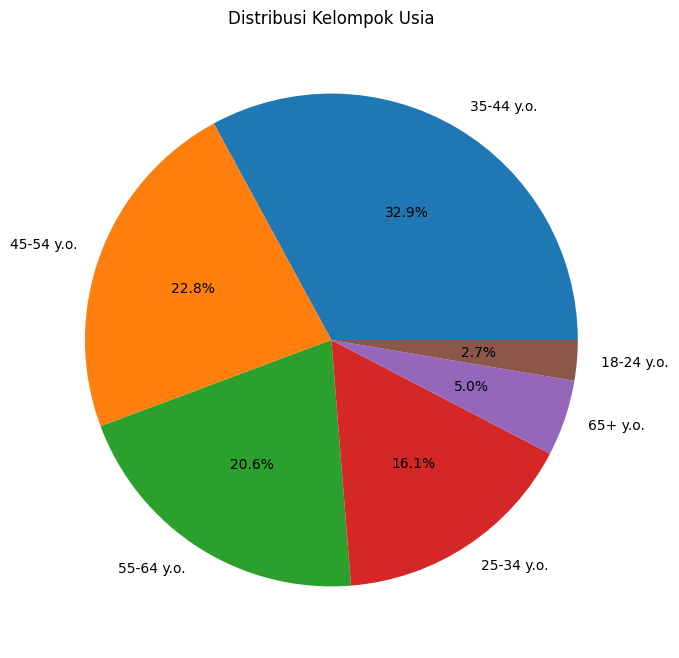

In [162]:
plt.figure(figsize=(8, 8))
plt.pie(AgeProp, labels=AgeProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Kelompok Usia')
plt.show()

In [163]:
spclean['DtGroup'] = spclean['Dt_Customer'].str[-4:]

spclean.insert(11, 'DtGroup', spclean.pop('DtGroup'))

spclean



,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,0,0,04/09/2012,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,1,1,08/03/2014,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,0,0,21/08/2013,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,1,0,10/02/2014,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,1,0,19/01/2014,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,0,1,13/06/2013,...,5,0,0,0,0,0,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,2,1,10/06/2014,...,7,0,0,0,1,0,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,0,0,25/01/2014,...,6,0,1,0,0,0,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,0,1,24/01/2014,...,3,0,0,0,0,0,0,3,11,0


In [164]:
DtProp = spclean['DtGroup'].value_counts().sort_index()
DtProp

2012     478
2013    1160
2014     549
Name: DtGroup, dtype: int64

Text(0, 0.5, 'DtCustomers (In Person)')

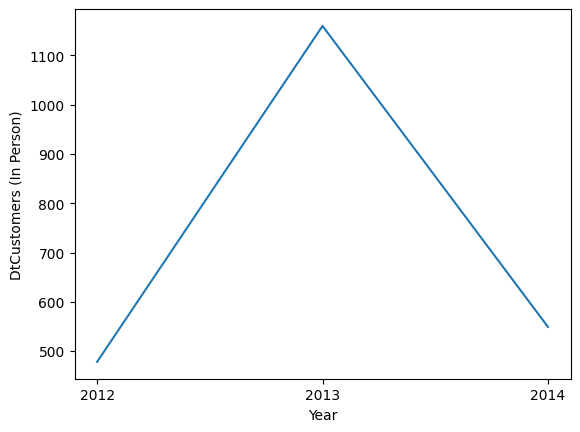

In [165]:
sns.lineplot(x=DtProp.index, y=DtProp)
plt.xlabel('Year') 
plt.ylabel('DtCustomers (In Person)')

In [166]:
conditions = [
    (spclean['Dt_Customer'] == 2012),
    (spclean['Dt_Customer'] == 2013),
    (spclean['Dt_Customer'] == 2014)
]

labels = ['2012', '2013', '2014']

spclean['DtGroup'] = np.select(conditions, labels, default='Unknown')

In [167]:
DtLine = spclean['DtGroup'].value_counts()
DtLine

Unknown    2187
Name: DtGroup, dtype: int64

In [168]:
EduProp = spclean['Education'].value_counts()
EduProp

Graduation    1103
PhD            477
Master         362
2n Cycle       196
Basic           49
Name: Education, dtype: int64

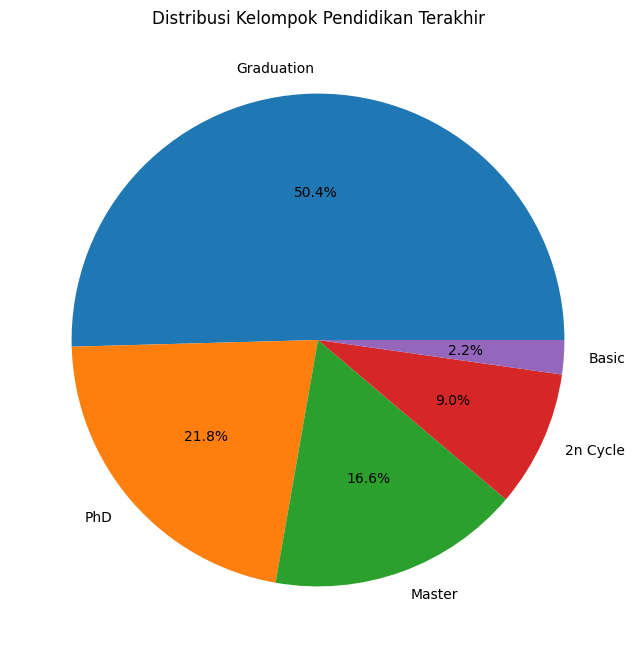

In [169]:

plt.figure(figsize=(8, 8))
plt.pie(EduProp, labels=EduProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Kelompok Pendidikan Terakhir')
plt.show()

In [170]:
IncomeConditions = [
    (spclean['Income'] >= 0.0) & (spclean['Income'] <= 24173.0),
    (spclean['Income'] > 24173.0) & (spclean['Income'] <= 72521.0),
    (spclean['Income'] > 72521.0)
]

IncomeLabels = ['Lower Class', 'Middle Class', 'Upper Class']

spclean['IncomeGroup'] = np.select(IncomeConditions, IncomeLabels, default='Unknown')

spclean.insert(7, 'IncomeGroup', spclean.pop('IncomeGroup'))

spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,5,0,0,0,0,0,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,7,0,0,0,1,0,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,6,0,1,0,0,0,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,3,0,0,0,0,0,0,3,11,0


In [171]:
IncomeProp = spclean['IncomeGroup'].value_counts()
IncomeProp

Middle Class    1580
Upper Class      413
Lower Class      194
Name: IncomeGroup, dtype: int64

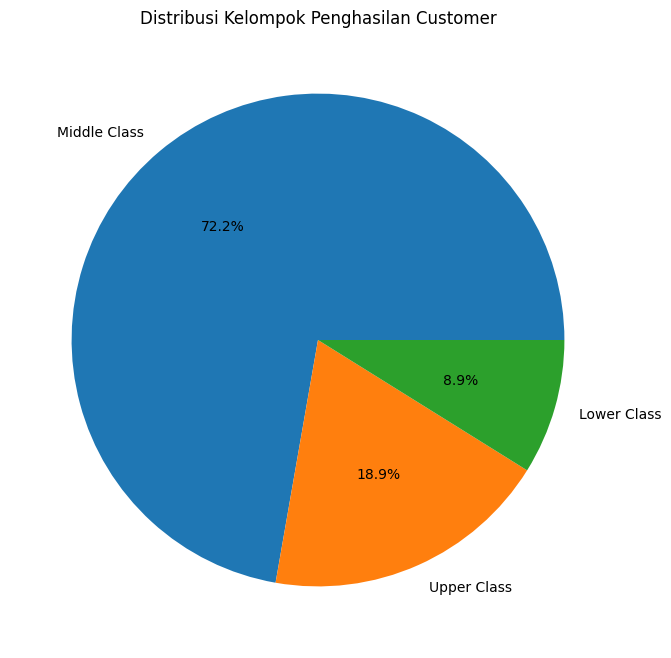

In [172]:
plt.figure(figsize=(8, 8))
plt.pie(IncomeProp, labels=IncomeProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Kelompok Penghasilan Customer')
plt.show()

In [173]:
year = spclean['Dt_Customer'].str[-4:]
year

0       2012
1       2014
2       2013
3       2014
4       2014
        ... 
2182    2013
2183    2014
2184    2014
2185    2014
2186    2012
Name: Dt_Customer, Length: 2187, dtype: object

In [174]:
YearProp = year.value_counts()
YearProp

2013    1160
2014     549
2012     478
Name: Dt_Customer, dtype: int64

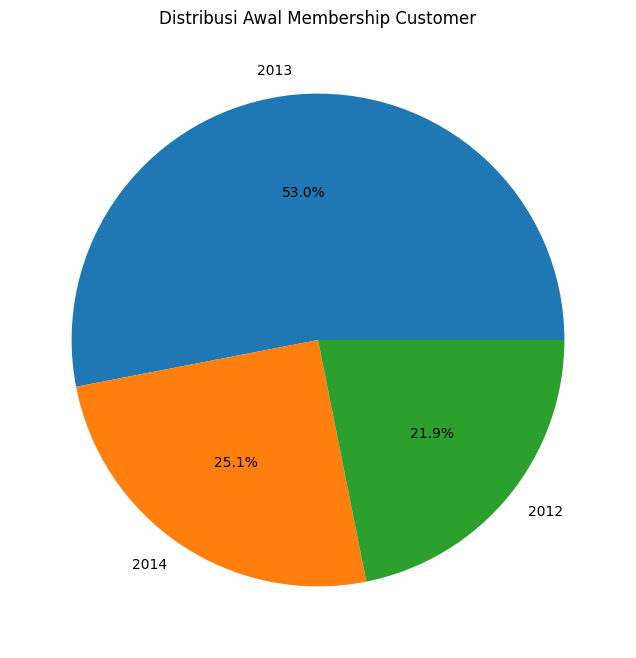

In [175]:
plt.figure(figsize=(8, 8))
plt.pie(YearProp, labels=YearProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Awal Membership Customer')
plt.show()

In [176]:
ComplainProp = spclean['Complain'].value_counts()
ComplainProp

0    2166
1      21
Name: Complain, dtype: int64

In [177]:
ComplainConditions = [
    (spclean['Complain'] == 0),
    (spclean['Complain'] == 1)
]

ComplainLabels = ['No', 'Yes']

spclean['ComplainNoYes'] = np.select(ComplainConditions, ComplainLabels, default='Unknown')

spclean.insert(29, 'ComplainNoYes', spclean.pop('ComplainNoYes'))

spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,0,0,0,0,No,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,0,0,0,0,No,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,0,0,0,0,No,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,0,0,0,0,No,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,0,0,0,0,No,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,0,0,0,0,No,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,0,0,1,0,No,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,0,1,0,0,0,No,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,0,0,0,0,No,0,3,11,0


In [178]:
ComplainProp = spclean['ComplainNoYes'].value_counts()
ComplainProp

No     2166
Yes      21
Name: ComplainNoYes, dtype: int64

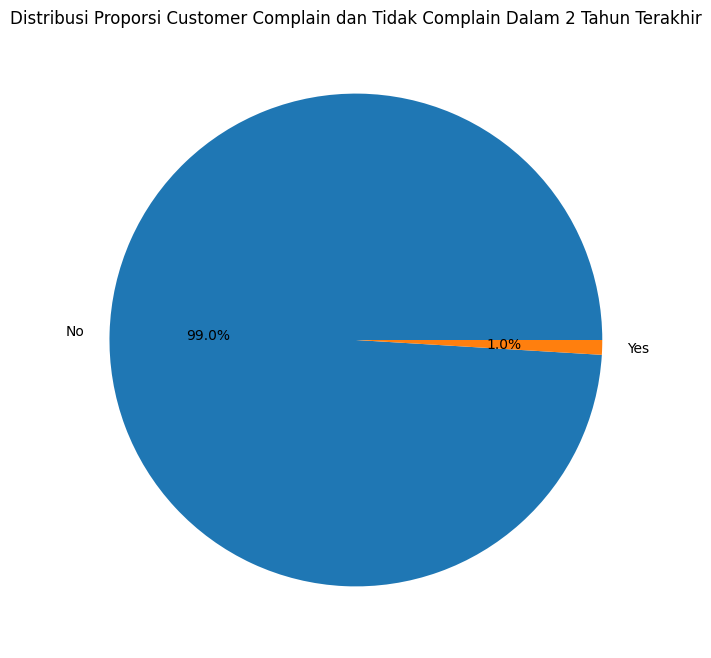

In [179]:
plt.figure(figsize=(8, 8))
plt.pie(ComplainProp, labels=ComplainProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Customer Complain dan Tidak Complain Dalam 2 Tahun Terakhir')
plt.show()

In [180]:
RecencyConditions = [
    (spclean['Recency'] >= 0) & (spclean['Recency'] <= 30),
    (spclean['Recency'] >= 31) & (spclean['Recency'] <= 60),
    (spclean['Recency'] >= 61) & (spclean['Recency'] <= 90),
    (spclean['Recency'] > 90)
]

RecencyLabels = ['1 month', '2 months', '3 months', '3 months+']

spclean['RecencyProp'] = np.select(RecencyConditions, RecencyLabels, default='Unknown')

spclean.insert(28, 'RecencyProp', spclean.pop('RecencyProp'))

spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,0,0,2 months,0,No,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,0,0,2 months,0,No,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,0,0,1 month,0,No,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,0,0,1 month,0,No,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,0,0,3 months+,0,No,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,0,0,2 months,0,No,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,0,1,2 months,0,No,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,1,0,0,3 months+,0,No,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,0,0,1 month,0,No,0,3,11,0


In [181]:
RecencyProp = spclean['RecencyProp'].value_counts()
RecencyProp

1 month      706
3 months     649
2 months     642
3 months+    190
Name: RecencyProp, dtype: int64

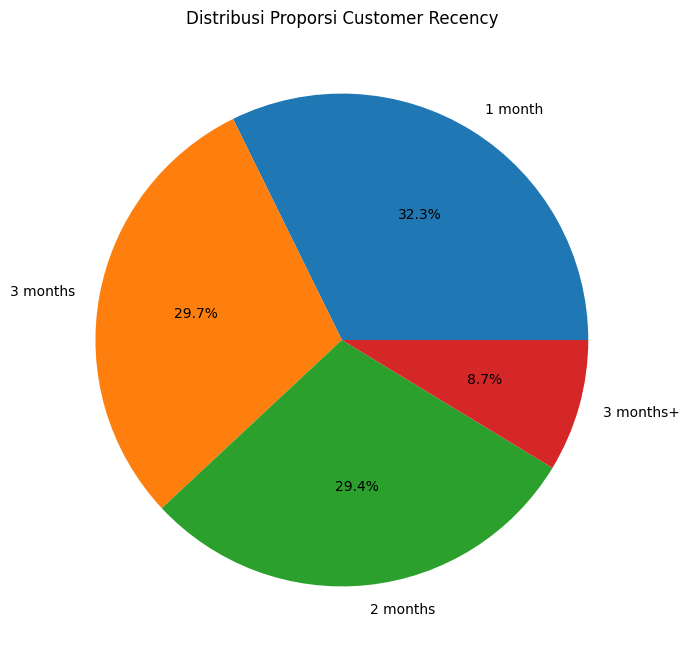

In [182]:
plt.figure(figsize=(8, 8))
plt.pie(RecencyProp, labels=RecencyProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Customer Recency')
plt.show()

In [183]:
sumProducts = spclean[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()
sumProducts

MntWines            675607
MntFruits            58195
MntMeatProducts     368010
MntFishProducts      83251
MntSweetProducts     59738
MntGoldProds         96146
dtype: int64

In [184]:
index_names = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
new_index_names = ['Wine', 'Fruits', 'MeatProducts', 'FishProducts', 'SweetProducts', 'GoldProds']
sumProducts = sumProducts.rename(index=dict(zip(index_names, new_index_names)))


sumProducts

Wine             675607
Fruits            58195
MeatProducts     368010
FishProducts      83251
SweetProducts     59738
GoldProds         96146
dtype: int64

In [185]:
abovewine = spclean[spclean['MntWines']>=spclean['MntWines'].mean()]
abovewine

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,0,0,2 months,0,No,0,3,11,1
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,0,0,1 month,0,No,0,3,11,0
5,7446,1967,47,45-54 y.o.,Master,Together,62513.0,Middle Class,0,1,...,0,0,0,1 month,0,No,0,3,11,0
12,2114,1946,68,65+ y.o.,PhD,Single,82800.0,Upper Class,0,0,...,0,1,1,1 month,0,No,0,3,11,1
15,6565,1949,65,65+ y.o.,Master,Married,76995.0,Upper Class,0,1,...,0,0,1,3 months+,0,No,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2178,9817,1970,44,35-44 y.o.,Master,Single,44802.0,Middle Class,0,0,...,0,0,0,3 months,0,No,0,3,11,0
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,0,0,2 months,0,No,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,0,1,2 months,0,No,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,1,0,0,3 months+,0,No,0,3,11,0


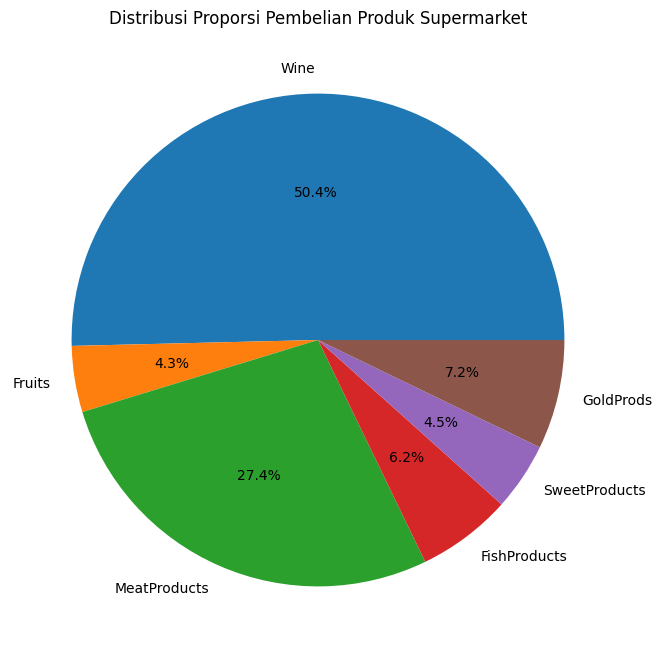

In [186]:
plt.figure(figsize=(8, 8))
plt.pie(sumProducts, labels=sumProducts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pembelian Produk Supermarket')
plt.show()

In [187]:
wine = spclean[['AgeGroup', 'MntWines']][(spclean['MntWines']>spclean['MntWines'].mean())]
wine = wine.reset_index()
wine = wine.drop('index', axis=1, inplace=False)
wine

,AgeGroup,MntWines
0,55-64 y.o.,635
1,45-54 y.o.,426
2,45-54 y.o.,520
3,65+ y.o.,1006
4,65+ y.o.,1012
...,...,...
847,35-44 y.o.,853
848,45-54 y.o.,709
849,65+ y.o.,406
850,25-34 y.o.,908


In [188]:
wineage = wine.groupby('AgeGroup')['MntWines'].sum()
wineage

AgeGroup
18-24 y.o.     18415
25-34 y.o.     70074
35-44 y.o.    152532
45-54 y.o.    143154
55-64 y.o.    132692
65+ y.o.       49210
Name: MntWines, dtype: int64

In [189]:
wineage.index

Index(['18-24 y.o.', '25-34 y.o.', '35-44 y.o.', '45-54 y.o.', '55-64 y.o.',
       '65+ y.o.'],
      dtype='object', name='AgeGroup')

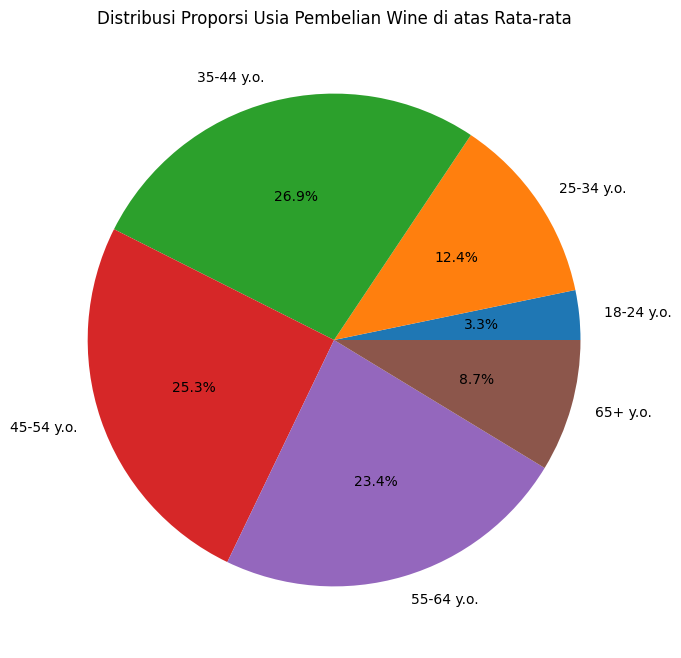

In [190]:
plt.figure(figsize=(8, 8))
plt.pie(wineage, labels=wineage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Pembelian Wine di atas Rata-rata')
plt.show()

In [191]:
wine2 = spclean[['Education', 'MntWines']][(spclean['MntWines']>spclean['MntWines'].mean())]
wine2 = wine2.reset_index()
wine2 = wine2.drop('index', axis=1, inplace=False)
wine2

,Education,MntWines
0,Graduation,635
1,Graduation,426
2,Master,520
3,PhD,1006
4,Master,1012
...,...,...
847,Master,853
848,Graduation,709
849,PhD,406
850,Graduation,908


In [192]:
wineedu = wine2.groupby('Education')['MntWines'].sum()
wineedu

Education
2n Cycle       32646
Graduation    256586
Master        101888
PhD           174957
Name: MntWines, dtype: int64

In [193]:
wineedu.index

Index(['2n Cycle', 'Graduation', 'Master', 'PhD'], dtype='object', name='Education')

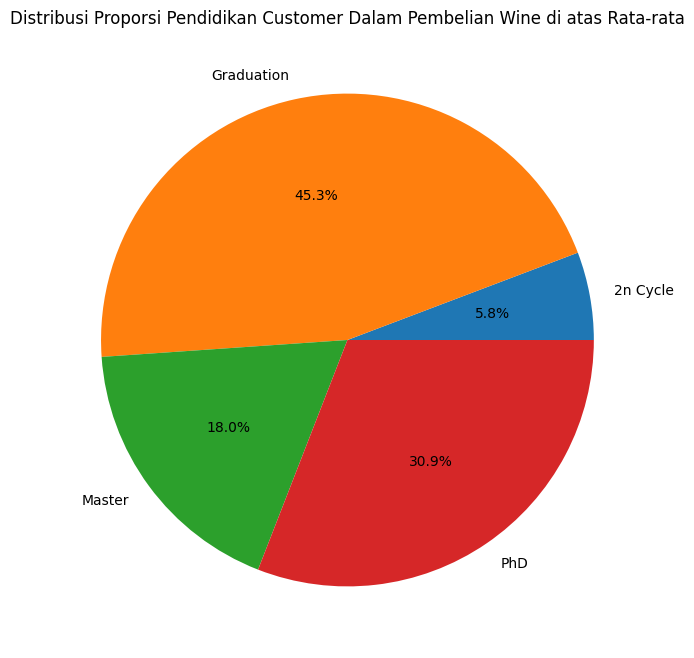

In [194]:
plt.figure(figsize=(8, 8))
plt.pie(wineedu, labels=wineedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Wine di atas Rata-rata')
plt.show()

In [195]:
wine3 = spclean[['IncomeGroup', 'MntWines']][(spclean['MntWines']>spclean['MntWines'].mean())]
wine3 = wine3.reset_index()
wine3 = wine3.drop('index', axis=1, inplace=False)
wine3

,IncomeGroup,MntWines
0,Middle Class,635
1,Middle Class,426
2,Middle Class,520
3,Upper Class,1006
4,Upper Class,1012
...,...,...
847,Middle Class,853
848,Middle Class,709
849,Middle Class,406
850,Middle Class,908


In [196]:
wineinc = wine3.groupby('IncomeGroup')['MntWines'].sum()
wineinc

IncomeGroup
Middle Class    308656
Upper Class     257421
Name: MntWines, dtype: int64

In [197]:
wineinc.index

Index(['Middle Class', 'Upper Class'], dtype='object', name='IncomeGroup')

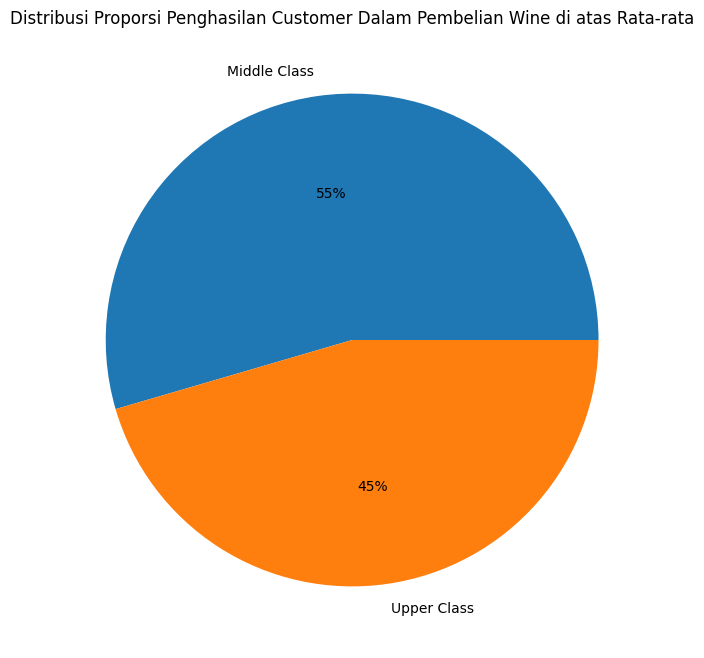

In [198]:
plt.figure(figsize=(8, 8))
plt.pie(wineinc, labels=wineinc.index, autopct='%1.f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Wine di atas Rata-rata')
plt.show()

In [199]:
meat = spclean[['AgeGroup', 'MntMeatProducts']][(spclean['MntMeatProducts']>spclean['MntMeatProducts'].mean())]
meat = meat.reset_index()
meat = meat.drop('index', axis=1, inplace=False)
meat

,AgeGroup,MntMeatProducts
0,55-64 y.o.,546
1,55-64 y.o.,480
2,65+ y.o.,498
3,45-54 y.o.,801
4,65+ y.o.,471
...,...,...
680,65+ y.o.,377
681,25-34 y.o.,538
682,45-54 y.o.,182
683,25-34 y.o.,217


In [200]:
meatage = meat.groupby('AgeGroup')['MntMeatProducts'].sum()
meatage

AgeGroup
18-24 y.o.    16482
25-34 y.o.    49469
35-44 y.o.    79650
45-54 y.o.    60651
55-64 y.o.    66702
65+ y.o.      25152
Name: MntMeatProducts, dtype: int64

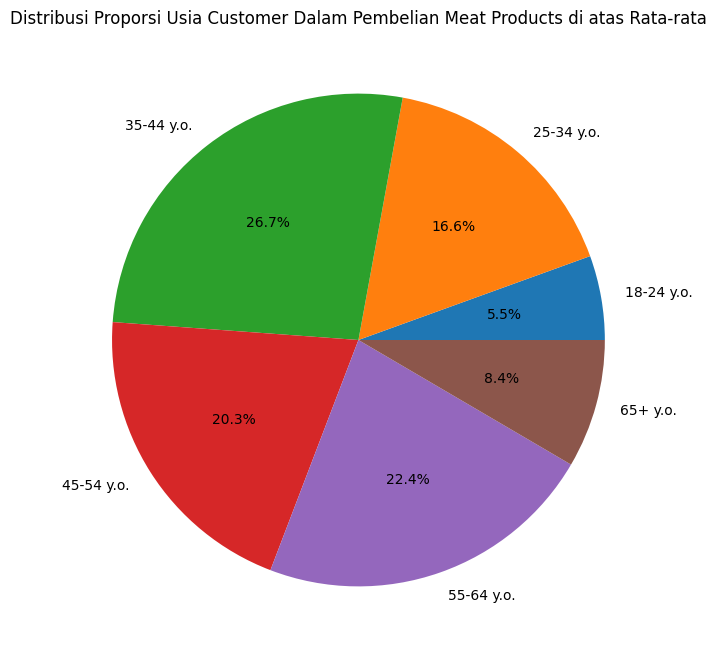

In [201]:
plt.figure(figsize=(8, 8))
plt.pie(meatage, labels=meatage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Customer Dalam Pembelian Meat Products di atas Rata-rata')
plt.show()

In [202]:
meat2 = spclean[['Education', 'MntMeatProducts']][(spclean['MntMeatProducts']>spclean['MntMeatProducts'].mean())]
meat2 = meat2.reset_index()
meat2 = meat2.drop('index', axis=1, inplace=False)
meat2

,Education,MntMeatProducts
0,Graduation,546
1,Graduation,480
2,Master,498
3,PhD,801
4,Master,471
...,...,...
680,PhD,377
681,Master,538
682,Graduation,182
683,Graduation,217


In [203]:
meatedu = meat2.groupby('Education')['MntMeatProducts'].sum()
meatedu

Education
2n Cycle       20438
Graduation    166299
Master         46687
PhD            64682
Name: MntMeatProducts, dtype: int64

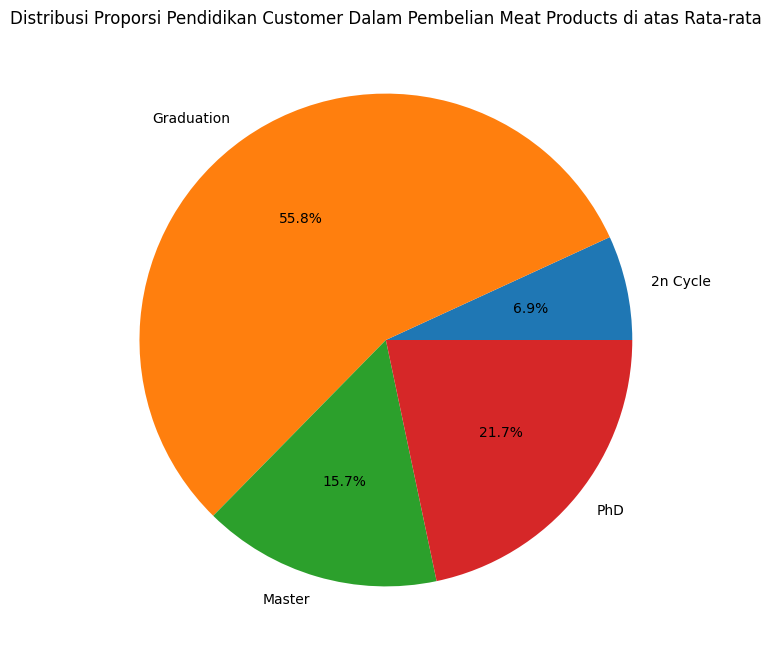

In [204]:
plt.figure(figsize=(8, 8))
plt.pie(meatedu, labels=meatedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Meat Products di atas Rata-rata')
plt.show()

In [205]:
meat3 = spclean[['IncomeGroup', 'MntMeatProducts']][(spclean['MntMeatProducts']>spclean['MntMeatProducts'].mean())]
meat3 = meat3.reset_index()
meat3 = meat3.drop('index', axis=1, inplace=False)
meat3

,IncomeGroup,MntMeatProducts
0,Middle Class,546
1,Middle Class,480
2,Upper Class,498
3,Upper Class,801
4,Middle Class,471
...,...,...
680,Upper Class,377
681,Upper Class,538
682,Middle Class,182
683,Middle Class,217


In [206]:
meatinc = meat3.groupby('IncomeGroup')['MntMeatProducts'].sum()
meatinc

IncomeGroup
Lower Class        226
Middle Class    111390
Upper Class     186490
Name: MntMeatProducts, dtype: int64

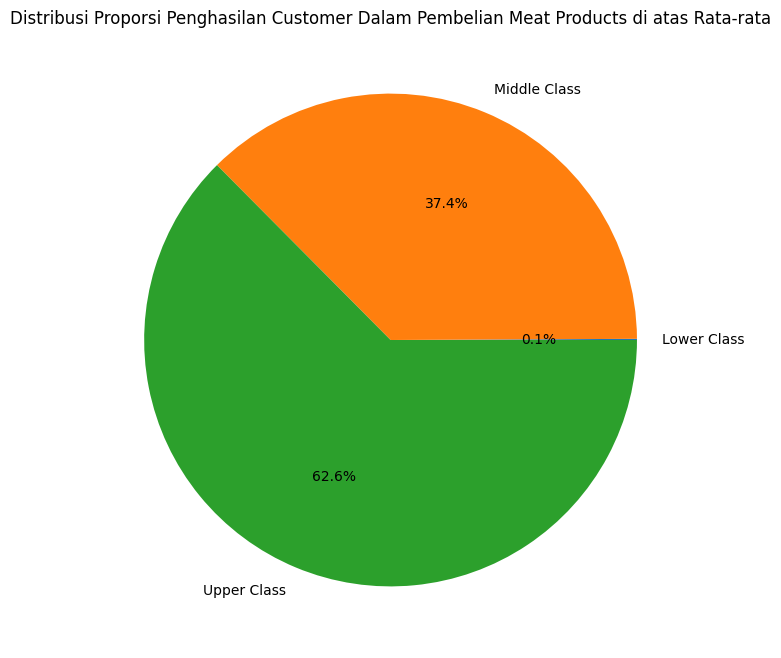

In [207]:
plt.figure(figsize=(8, 8))
plt.pie(meatinc, labels=meatinc.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Meat Products di atas Rata-rata')
plt.show()

In [208]:
fruit = spclean[['AgeGroup', 'MntFruits']][(spclean['MntFruits']>spclean['MntFruits'].mean())]
fruit = fruit.reset_index()
fruit = fruit.drop('index', axis=1, inplace=False)
fruit

,AgeGroup,MntFruits
0,55-64 y.o.,88
1,45-54 y.o.,49
2,25-34 y.o.,43
3,45-54 y.o.,42
4,35-44 y.o.,65
...,...,...
629,65+ y.o.,194
630,35-44 y.o.,31
631,45-54 y.o.,43
632,25-34 y.o.,48


In [209]:
fruitage = fruit.groupby('AgeGroup')['MntFruits'].sum()
fruitage

AgeGroup
18-24 y.o.     2044
25-34 y.o.     7933
35-44 y.o.    14150
45-54 y.o.    10984
55-64 y.o.    10001
65+ y.o.       3235
Name: MntFruits, dtype: int64

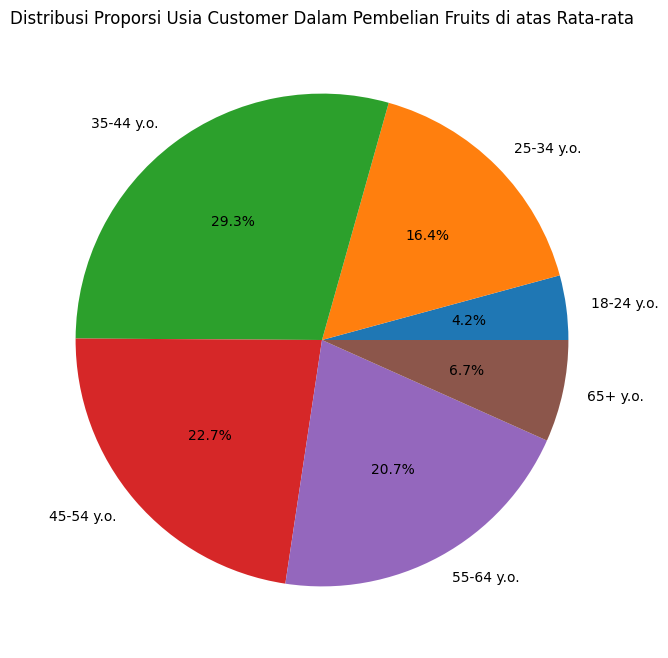

In [210]:
plt.figure(figsize=(8, 8))
plt.pie(fruitage, labels=fruitage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Customer Dalam Pembelian Fruits di atas Rata-rata')
plt.show()

In [211]:
fruit1 = spclean[['Education', 'MntFruits']][(spclean['MntFruits']>spclean['MntFruits'].mean())]
fruit1 = fruit1.reset_index()
fruit1 = fruit1.drop('index', axis=1, inplace=False)
fruit1

,Education,MntFruits
0,Graduation,88
1,Graduation,49
2,PhD,43
3,Master,42
4,Graduation,65
...,...,...
629,PhD,194
630,Graduation,31
631,Graduation,43
632,Graduation,48


In [212]:
fruitedu = fruit1.groupby('Education')['MntFruits'].sum()
fruitedu

Education
2n Cycle       4608
Basic           158
Graduation    29454
Master         6237
PhD            7890
Name: MntFruits, dtype: int64

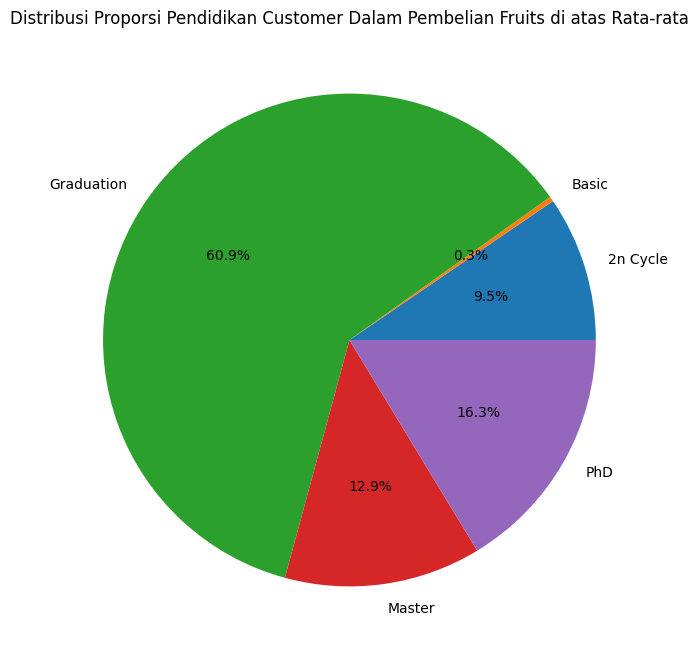

In [213]:
plt.figure(figsize=(8, 8))
plt.pie(fruitedu, labels=fruitedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Fruits di atas Rata-rata')
plt.show()

In [214]:
fruit2 = spclean[['IncomeGroup', 'MntFruits']][(spclean['MntFruits']>spclean['MntFruits'].mean())]
fruit2 = fruit2.reset_index()
fruit2 = fruit2.drop('index', axis=1, inplace=False)
fruit2

,IncomeGroup,MntFruits
0,Middle Class,88
1,Middle Class,49
2,Middle Class,43
3,Middle Class,42
4,Middle Class,65
...,...,...
629,Upper Class,194
630,Middle Class,31
631,Middle Class,43
632,Middle Class,48


In [215]:
fruitinc = fruit2.groupby('IncomeGroup')['MntFruits'].sum()
fruitinc

IncomeGroup
Lower Class       120
Middle Class    23518
Upper Class     24709
Name: MntFruits, dtype: int64

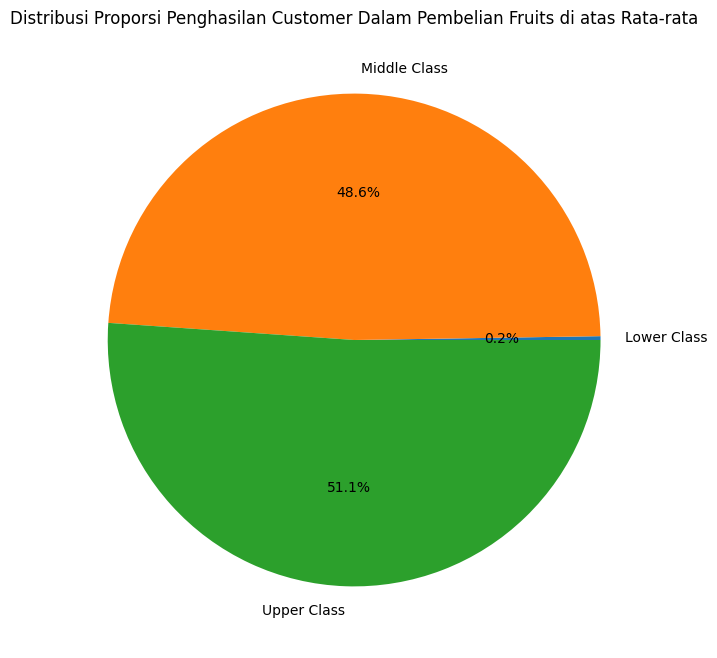

In [216]:
plt.figure(figsize=(8, 8))
plt.pie(fruitinc, labels=fruitinc.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Fruits di atas Rata-rata')
plt.show()

In [217]:
fish = spclean[['AgeGroup', 'MntFishProducts']][(spclean['MntFishProducts']>spclean['MntFishProducts'].mean())]
fish = fish.reset_index()
fish = fish.drop('index', axis=1, inplace=False)
fish

,AgeGroup,MntFishProducts
0,55-64 y.o.,172
1,45-54 y.o.,111
2,25-34 y.o.,46
3,35-44 y.o.,50
4,55-64 y.o.,225
...,...,...
640,18-24 y.o.,72
641,65+ y.o.,149
642,25-34 y.o.,69
643,45-54 y.o.,42


In [218]:
fishage = fish.groupby('AgeGroup')['MntFishProducts'].sum()
fishage

AgeGroup
18-24 y.o.     2747
25-34 y.o.    11050
35-44 y.o.    20114
45-54 y.o.    13904
55-64 y.o.    16013
65+ y.o.       5374
Name: MntFishProducts, dtype: int64

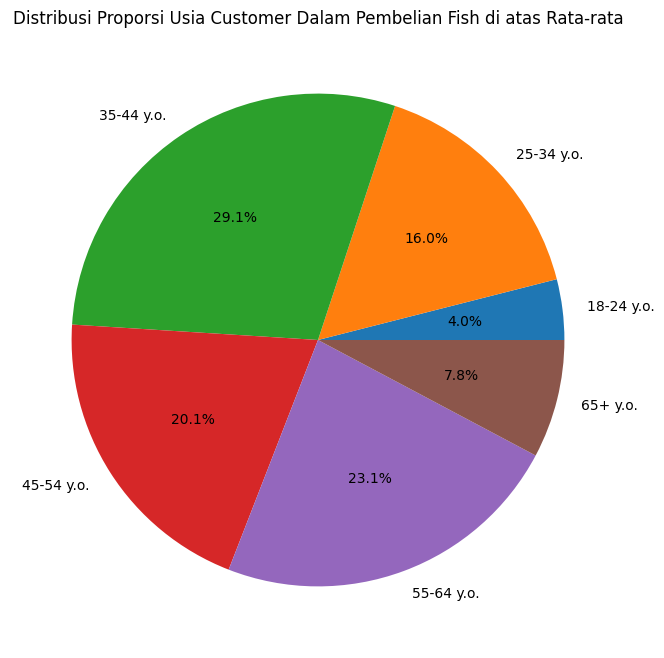

In [219]:
plt.figure(figsize=(8, 8))
plt.pie(fishage, labels=fishage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Customer Dalam Pembelian Fish di atas Rata-rata')
plt.show()

In [220]:
fish2 = spclean[['Education', 'MntFishProducts']][(spclean['MntFishProducts']>spclean['MntFishProducts'].mean())]
fish2 = fish2.reset_index()
fish2 = fish2.drop('index', axis=1, inplace=False)
fish2

,Education,MntFishProducts
0,Graduation,172
1,Graduation,111
2,PhD,46
3,Graduation,50
4,Graduation,225
...,...,...
640,2n Cycle,72
641,PhD,149
642,Master,69
643,Graduation,42


In [221]:
fishedu = fish2.groupby('Education')['MntFishProducts'].sum()
fishedu

Education
2n Cycle       8037
Basic           382
Graduation    41224
Master         9166
PhD           10393
Name: MntFishProducts, dtype: int64

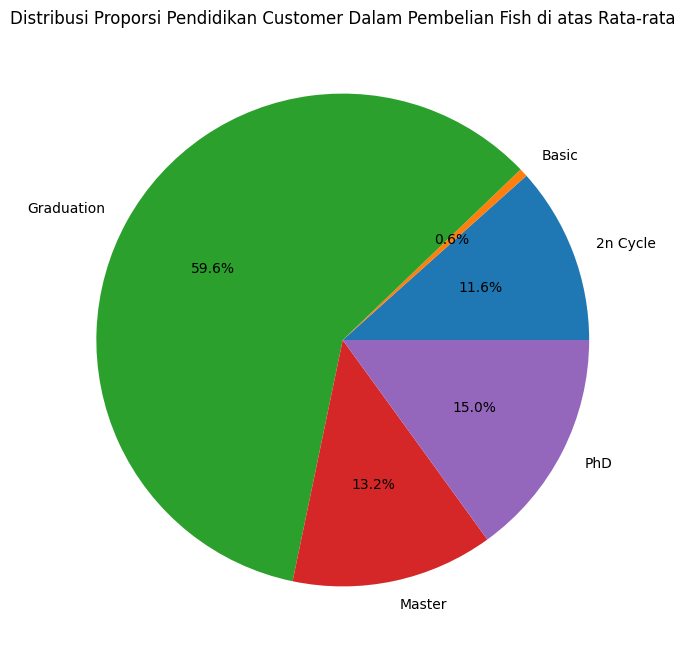

In [222]:
plt.figure(figsize=(8, 8))
plt.pie(fishedu, labels=fishedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Fish di atas Rata-rata')
plt.show()

In [223]:
fish3 = spclean[['IncomeGroup', 'MntFishProducts']][(spclean['MntFishProducts']>spclean['MntFishProducts'].mean())]
fish3 = fish3.reset_index()
fish3 = fish3.drop('index', axis=1, inplace=False)
fish3

,IncomeGroup,MntFishProducts
0,Middle Class,172
1,Middle Class,111
2,Middle Class,46
3,Middle Class,50
4,Middle Class,225
...,...,...
640,Upper Class,72
641,Upper Class,149
642,Upper Class,69
643,Middle Class,42


In [224]:
fishinc = fish3.groupby('IncomeGroup')['MntFishProducts'].sum()
fishinc

IncomeGroup
Lower Class        51
Middle Class    33573
Upper Class     35578
Name: MntFishProducts, dtype: int64

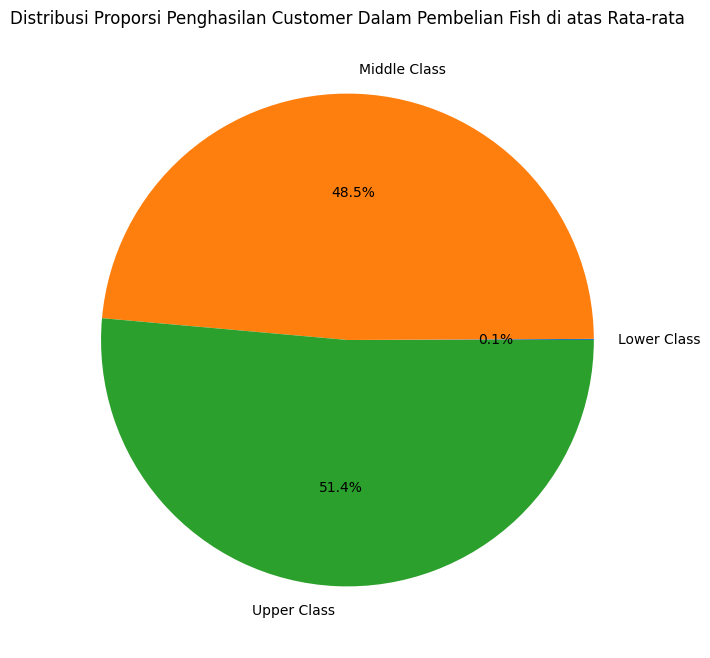

In [225]:
plt.figure(figsize=(8, 8))
plt.pie(fishinc, labels=fishinc.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Fish di atas Rata-rata')
plt.show()

In [226]:
sweet = spclean[['AgeGroup', 'MntSweetProducts']][(spclean['MntSweetProducts']>spclean['MntSweetProducts'].mean())]
sweet = sweet.reset_index()
sweet = sweet.drop('index', axis=1, inplace=False)
sweet

,AgeGroup,MntSweetProducts
0,55-64 y.o.,88
1,45-54 y.o.,42
2,35-44 y.o.,49
3,55-64 y.o.,112
4,65+ y.o.,68
...,...,...
630,18-24 y.o.,55
631,65+ y.o.,125
632,35-44 y.o.,48
633,45-54 y.o.,118


In [227]:
sweetage = sweet.groupby('AgeGroup')['MntSweetProducts'].sum()
sweetage

AgeGroup
18-24 y.o.     1754
25-34 y.o.     8045
35-44 y.o.    15360
45-54 y.o.    10160
55-64 y.o.    10901
65+ y.o.       3638
Name: MntSweetProducts, dtype: int64

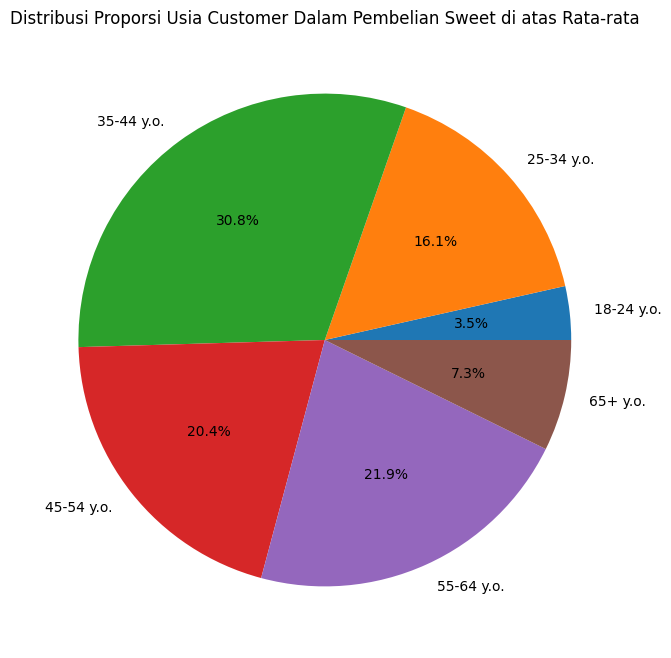

In [228]:
plt.figure(figsize=(8, 8))
plt.pie(sweetage, labels=sweetage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Customer Dalam Pembelian Sweet di atas Rata-rata')
plt.show()

In [229]:
sweet2 = spclean[['Education', 'MntSweetProducts']][(spclean['MntSweetProducts']>spclean['MntSweetProducts'].mean())]
sweet2 = sweet2.reset_index()
sweet2 = sweet2.drop('index', axis=1, inplace=False)
sweet2

,Education,MntSweetProducts
0,Graduation,88
1,Master,42
2,Graduation,49
3,Graduation,112
4,PhD,68
...,...,...
630,2n Cycle,55
631,PhD,125
632,Graduation,48
633,Graduation,118


In [230]:
sweetedu = sweet2.groupby('Education')['MntSweetProducts'].sum()
sweetedu

Education
2n Cycle       5939
Basic           270
Graduation    29516
Master         5954
PhD            8179
Name: MntSweetProducts, dtype: int64

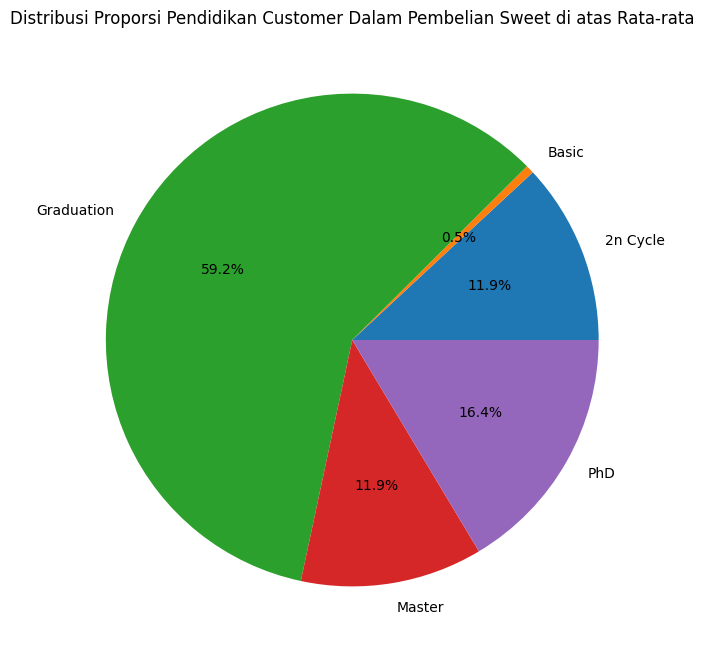

In [231]:
plt.figure(figsize=(8, 8))
plt.pie(sweetedu, labels=sweetedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Sweet di atas Rata-rata')
plt.show()

In [232]:
sweet3 = spclean[['IncomeGroup', 'MntSweetProducts']][(spclean['MntSweetProducts']>spclean['MntSweetProducts'].mean())]
sweet3 = sweet3.reset_index()
sweet3 = sweet3.drop('index', axis=1, inplace=False)
sweet3

,IncomeGroup,MntSweetProducts
0,Middle Class,88
1,Middle Class,42
2,Middle Class,49
3,Middle Class,112
4,Upper Class,68
...,...,...
630,Upper Class,55
631,Upper Class,125
632,Middle Class,48
633,Middle Class,118


In [233]:
sweetinc = sweet3.groupby('IncomeGroup')['MntSweetProducts'].sum()
sweetinc

IncomeGroup
Lower Class       223
Middle Class    23362
Upper Class     26273
Name: MntSweetProducts, dtype: int64

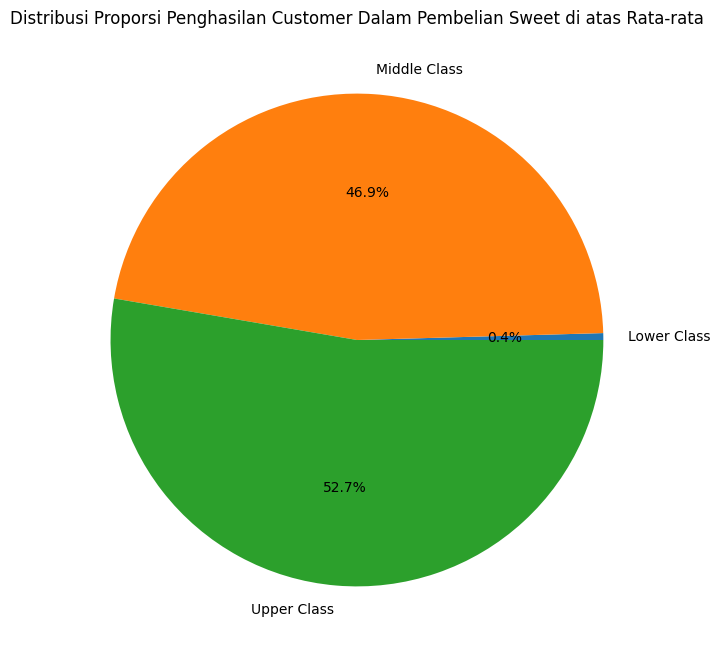

In [234]:
plt.figure(figsize=(8, 8))
plt.pie(sweetinc, labels=sweetinc.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Sweet di atas Rata-rata')
plt.show()

In [235]:
gold = spclean[['AgeGroup', 'MntGoldProds']][(spclean['MntGoldProds']>spclean['MntGoldProds'].mean())]
gold = gold.reset_index()
gold = gold.drop('index', axis=1, inplace=False)
gold

,AgeGroup,MntGoldProds
0,55-64 y.o.,88
1,65+ y.o.,45
2,65+ y.o.,176
3,25-34 y.o.,48
4,55-64 y.o.,99
...,...,...
688,45-54 y.o.,88
689,35-44 y.o.,53
690,45-54 y.o.,91
691,45-54 y.o.,247


In [236]:
goldage = gold.groupby('AgeGroup')['MntGoldProds'].sum()
goldage

AgeGroup
18-24 y.o.     3018
25-34 y.o.     9794
35-44 y.o.    20659
45-54 y.o.    16848
55-64 y.o.    17989
65+ y.o.       3685
Name: MntGoldProds, dtype: int64

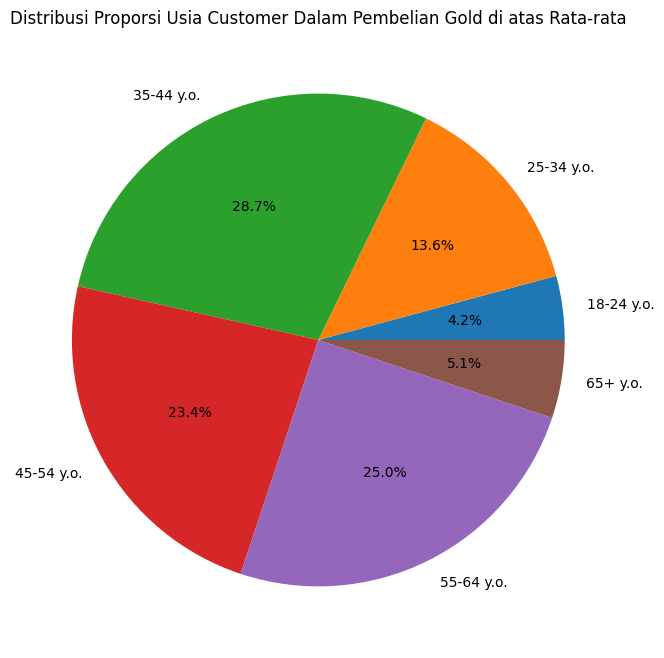

In [237]:
plt.figure(figsize=(8, 8))
plt.pie(goldage, labels=goldage.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Usia Customer Dalam Pembelian Gold di atas Rata-rata')
plt.show()

In [238]:
gold2 = spclean[['Education', 'MntGoldProds']][(spclean['MntGoldProds']>spclean['MntGoldProds'].mean())]
gold2 = gold2.reset_index()
gold2 = gold2.drop('index', axis=1, inplace=False)
gold2

,Education,MntGoldProds
0,Graduation,88
1,PhD,45
2,Master,176
3,Graduation,48
4,Graduation,99
...,...,...
688,Graduation,88
689,Graduation,53
690,Graduation,91
691,Graduation,247


In [239]:
goldedu = gold2.groupby('Education')['MntGoldProds'].sum()
goldedu

Education
2n Cycle       6855
Basic           436
Graduation    44269
Master        10649
PhD            9784
Name: MntGoldProds, dtype: int64

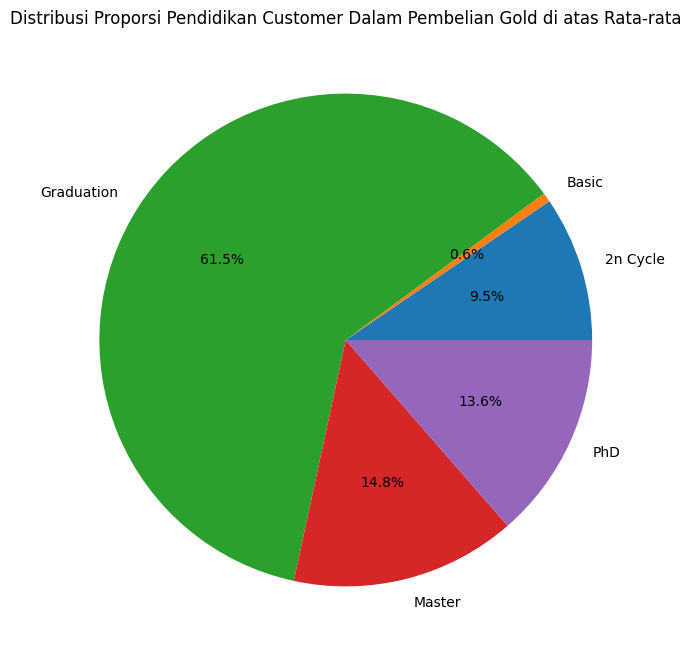

In [240]:
plt.figure(figsize=(8, 8))
plt.pie(goldedu, labels=goldedu.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Pendidikan Customer Dalam Pembelian Gold di atas Rata-rata')
plt.show()

In [241]:
gold3 = spclean[['IncomeGroup', 'MntGoldProds']][(spclean['MntGoldProds']>spclean['MntGoldProds'].mean())]
gold3 = gold3.reset_index()
gold3 = gold3.drop('index', axis=1, inplace=False)
gold3

,IncomeGroup,MntGoldProds
0,Middle Class,88
1,Upper Class,45
2,Upper Class,176
3,Middle Class,48
4,Middle Class,99
...,...,...
688,Middle Class,88
689,Middle Class,53
690,Middle Class,91
691,Middle Class,247


In [242]:
goldinc = gold3.groupby('IncomeGroup')['MntGoldProds'].sum()
goldinc

IncomeGroup
Lower Class       409
Middle Class    46222
Upper Class     25362
Name: MntGoldProds, dtype: int64

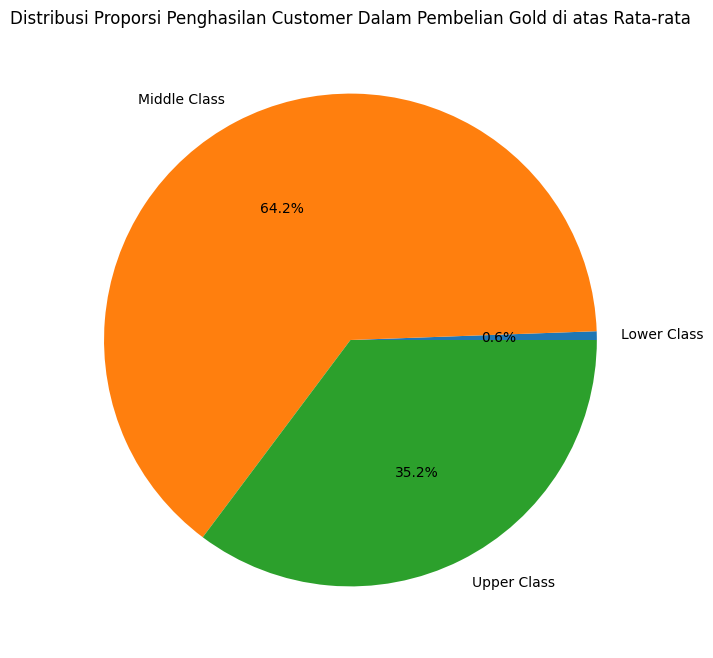

In [243]:
plt.figure(figsize=(8, 8))
plt.pie(goldinc, labels=goldinc.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Penghasilan Customer Dalam Pembelian Gold di atas Rata-rata')
plt.show()

In [244]:
# RECENCY COMPLAIN
recentcomplain = spclean[spclean['ComplainNoYes']=='Yes']
recentcomplain = recentcomplain.reset_index()
recentcomplain = recentcomplain.drop('index', axis=1, inplace=False)
recentcomplain

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,10401,1976,38,35-44 y.o.,2n Cycle,Together,26326.0,Middle Class,0,0,...,0,0,0,1 month,0,Yes,1,3,11,0
1,3120,1981,33,25-34 y.o.,Graduation,Together,38547.0,Middle Class,1,0,...,0,0,0,2 months,0,Yes,1,3,11,0
2,7829,1900,114,65+ y.o.,2n Cycle,Divorced,36640.0,Middle Class,1,0,...,0,0,0,3 months+,0,Yes,1,3,11,0
3,5726,1983,31,25-34 y.o.,Master,Single,31788.0,Middle Class,1,0,...,0,0,0,1 month,0,Yes,1,3,11,0
4,6201,1978,36,35-44 y.o.,Graduation,Single,38643.0,Middle Class,1,1,...,0,0,0,2 months,0,Yes,1,3,11,0
5,6142,1943,71,65+ y.o.,Master,Married,65073.0,Middle Class,0,0,...,0,0,0,3 months,0,Yes,1,3,11,0
6,3710,1984,30,25-34 y.o.,PhD,Single,39684.0,Middle Class,1,0,...,0,0,0,2 months,0,Yes,1,3,11,1
7,10995,1988,26,25-34 y.o.,2n Cycle,Married,15716.0,Lower Class,1,0,...,0,0,0,1 month,0,Yes,1,3,11,0
8,6730,1954,60,55-64 y.o.,Graduation,Married,38998.0,Middle Class,1,1,...,0,0,0,3 months+,0,Yes,1,3,11,0
9,2875,1978,36,35-44 y.o.,Graduation,Married,67023.0,Middle Class,0,0,...,0,0,0,3 months+,0,Yes,1,3,11,0


In [245]:
RecencyConditions = [
    (recentcomplain['Recency'] >= 0) & (recentcomplain['Recency'] <= 30),
    (recentcomplain['Recency'] >= 31) & (recentcomplain['Recency'] <= 60),
    (recentcomplain['Recency'] >= 61) & (recentcomplain['Recency'] <= 90),
    (recentcomplain['Recency'] > 90)
]

RecencyLabels = ['1 month', '2 months', '3 months', '3 months+']

recentcomplain['RecencyGroup'] = np.select(RecencyConditions, RecencyLabels, default='Unknown')

recentcomplain.insert(10, 'RecencyGroup', recentcomplain.pop('RecencyGroup'))

recentcomplain

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,10401,1976,38,35-44 y.o.,2n Cycle,Together,26326.0,Middle Class,0,0,...,0,0,0,1 month,0,Yes,1,3,11,0
1,3120,1981,33,25-34 y.o.,Graduation,Together,38547.0,Middle Class,1,0,...,0,0,0,2 months,0,Yes,1,3,11,0
2,7829,1900,114,65+ y.o.,2n Cycle,Divorced,36640.0,Middle Class,1,0,...,0,0,0,3 months+,0,Yes,1,3,11,0
3,5726,1983,31,25-34 y.o.,Master,Single,31788.0,Middle Class,1,0,...,0,0,0,1 month,0,Yes,1,3,11,0
4,6201,1978,36,35-44 y.o.,Graduation,Single,38643.0,Middle Class,1,1,...,0,0,0,2 months,0,Yes,1,3,11,0
5,6142,1943,71,65+ y.o.,Master,Married,65073.0,Middle Class,0,0,...,0,0,0,3 months,0,Yes,1,3,11,0
6,3710,1984,30,25-34 y.o.,PhD,Single,39684.0,Middle Class,1,0,...,0,0,0,2 months,0,Yes,1,3,11,1
7,10995,1988,26,25-34 y.o.,2n Cycle,Married,15716.0,Lower Class,1,0,...,0,0,0,1 month,0,Yes,1,3,11,0
8,6730,1954,60,55-64 y.o.,Graduation,Married,38998.0,Middle Class,1,1,...,0,0,0,3 months+,0,Yes,1,3,11,0
9,2875,1978,36,35-44 y.o.,Graduation,Married,67023.0,Middle Class,0,0,...,0,0,0,3 months+,0,Yes,1,3,11,0


In [246]:
recency = recentcomplain['RecencyGroup'].value_counts()
recency

2 months     8
1 month      5
3 months+    4
3 months     4
Name: RecencyGroup, dtype: int64

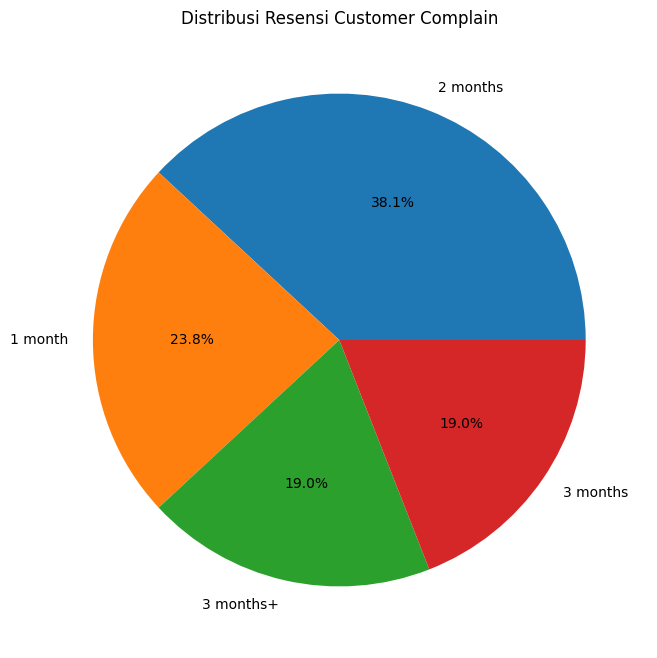

In [247]:
plt.figure(figsize=(8, 8))
plt.pie(recency, labels=recency.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Resensi Customer Complain')
plt.show()

In [248]:
conditions = [
    (spclean['NumDealsPurchases'] == 0),
    (spclean['NumDealsPurchases'] > 0)
]

labels = ['No', 'Yes']

spclean['DealPurchasesGroup'] = np.select(conditions, labels, default='Unknown')


In [249]:
spclean.insert(19, 'DealPurchasesGroup', spclean.pop('DealPurchasesGroup'))

spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,0,0,2 months,0,No,0,3,11,1
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,0,0,2 months,0,No,0,3,11,0
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,0,0,1 month,0,No,0,3,11,0
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,0,0,1 month,0,No,0,3,11,0
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,0,0,3 months+,0,No,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,0,0,2 months,0,No,0,3,11,0
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,0,1,2 months,0,No,0,3,11,0
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,1,0,0,3 months+,0,No,0,3,11,0
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,0,0,1 month,0,No,0,3,11,0


In [250]:
DealPurchasesProp = spclean['DealPurchasesGroup'].value_counts()
DealPurchasesProp

Yes    2150
No       37
Name: DealPurchasesGroup, dtype: int64

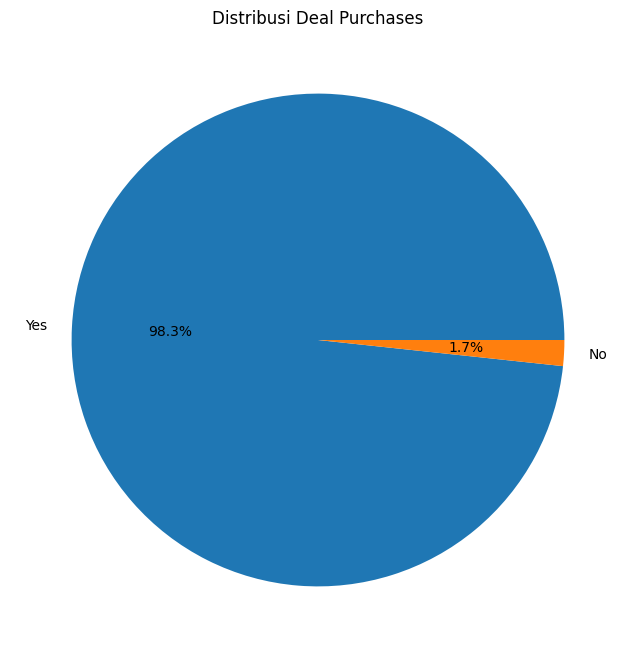

In [251]:
plt.figure(figsize=(8, 8))
plt.pie(DealPurchasesProp, labels=DealPurchasesProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Deal Purchases')
plt.show()

In [252]:
sumPlace = spclean[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum()
sumPlace

NumWebPurchases         8964
NumCatalogPurchases     5877
NumStorePurchases      12806
dtype: int64

In [253]:
index_names = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
new_index_names = ['WebPurchases', 'CatalogPurchases', 'StorePurchases']
sumPlace = sumPlace.rename(index=dict(zip(index_names, new_index_names)))


sumPlace

WebPurchases         8964
CatalogPurchases     5877
StorePurchases      12806
dtype: int64

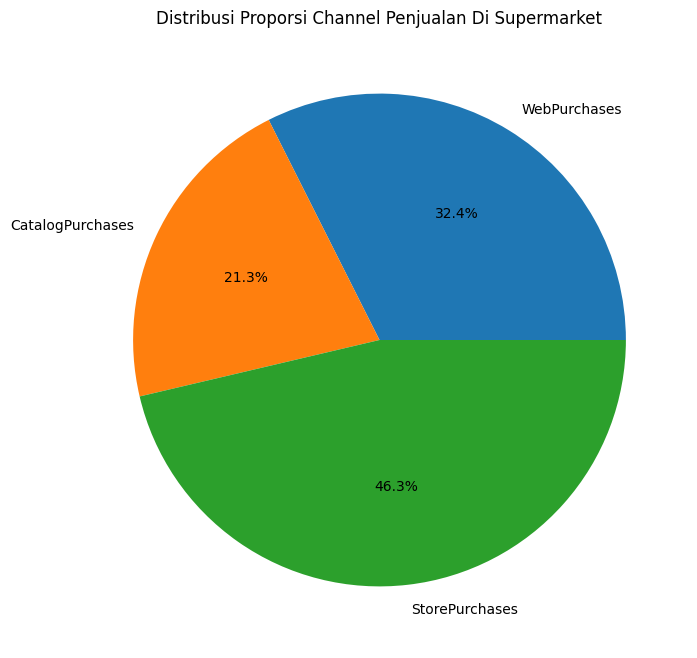

In [254]:
plt.figure(figsize=(8, 8))
plt.pie(sumPlace, labels=sumPlace.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Proporsi Channel Penjualan Di Supermarket')
plt.show()

In [255]:
conditions = [
    (spclean['NumWebVisitsMonth'] == 0),
    (spclean['NumWebVisitsMonth'] >= 1) & (spclean['NumWebVisitsMonth'] <= 4),
    (spclean['NumWebVisitsMonth'] >= 5),
]

labels = ['Never Visit', 'Low Freq Visit', 'High Freq Visit']

spclean['WebVisitGroup'] = np.select(conditions, labels, default='Unknown')

In [256]:
WebVisitProp = spclean['WebVisitGroup'].value_counts()
WebVisitProp

High Freq Visit    1409
Low Freq Visit      769
Never Visit           9
Name: WebVisitGroup, dtype: int64

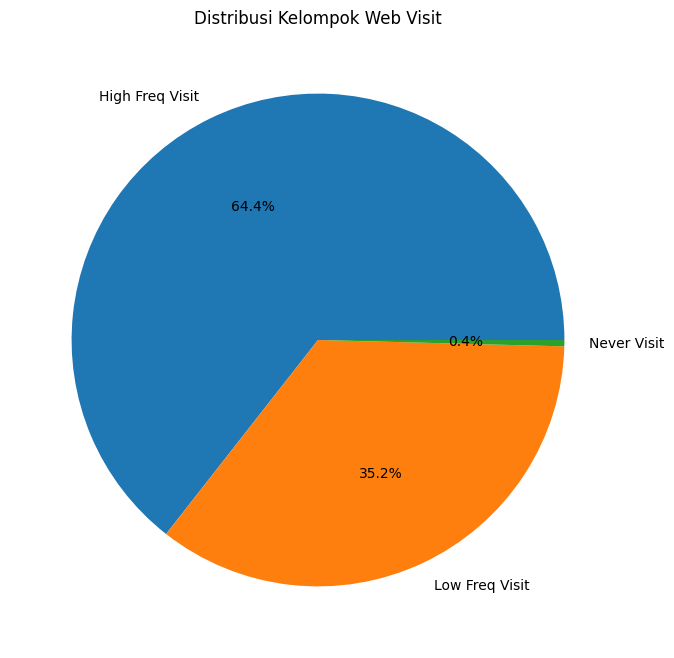

In [257]:
plt.figure(figsize=(8, 8))
plt.pie(WebVisitProp, labels=WebVisitProp.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Kelompok Web Visit')
plt.show()

In [258]:
conditions = [
    (spclean['AcceptedCmp1'] == 0),
    (spclean['AcceptedCmp1'] == 1)
]

labels = ['No', 'Yes']

spclean['AcceptedCmp1Group'] = np.select(conditions, labels, default='Unknown')
spclean


,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp1,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,2 months,0,No,0,3,11,1,High Freq Visit,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,2 months,0,No,0,3,11,0,High Freq Visit,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,1 month,0,No,0,3,11,0,Low Freq Visit,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,1 month,0,No,0,3,11,0,High Freq Visit,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,3 months+,0,No,0,3,11,0,High Freq Visit,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,2 months,0,No,0,3,11,0,High Freq Visit,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,1,2 months,0,No,0,3,11,0,High Freq Visit,Yes
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,0,3 months+,0,No,0,3,11,0,High Freq Visit,No
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,1 month,0,No,0,3,11,0,Low Freq Visit,No


In [259]:
AcceptedCmp1Prop = spclean['AcceptedCmp1Group'].value_counts()
AcceptedCmp1Prop

No     2045
Yes     142
Name: AcceptedCmp1Group, dtype: int64

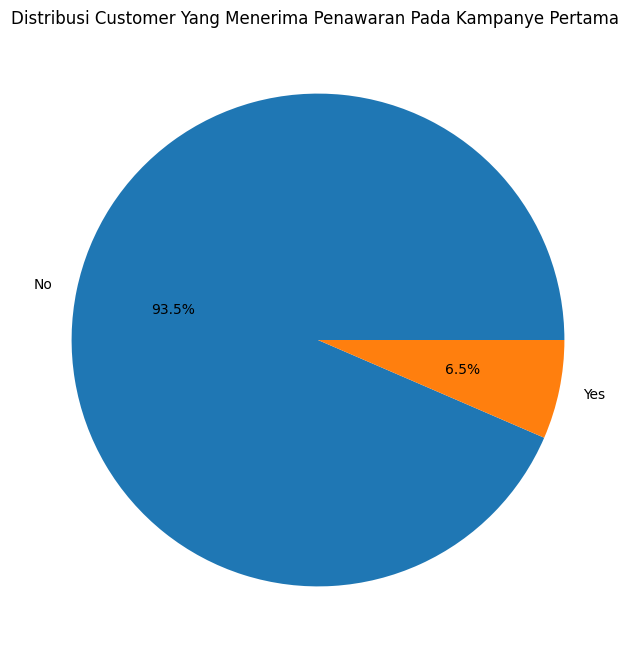

In [260]:
plt.figure(figsize=(8, 8))
plt.pie(AcceptedCmp1Prop, labels=AcceptedCmp1Prop.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Kampanye Pertama ')
plt.show()

In [261]:
conditions = [
    (spclean['AcceptedCmp2'] == 0),
    (spclean['AcceptedCmp2'] == 1)
]

labels = ['No', 'Yes']

spclean['AcceptedCmp2Group'] = np.select(conditions, labels, default='Unknown')
spclean


,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,RecencyProp,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group,AcceptedCmp2Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,2 months,0,No,0,3,11,1,High Freq Visit,No,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,2 months,0,No,0,3,11,0,High Freq Visit,No,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,1 month,0,No,0,3,11,0,Low Freq Visit,No,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,1 month,0,No,0,3,11,0,High Freq Visit,No,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,3 months+,0,No,0,3,11,0,High Freq Visit,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,2 months,0,No,0,3,11,0,High Freq Visit,No,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,2 months,0,No,0,3,11,0,High Freq Visit,Yes,No
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,3 months+,0,No,0,3,11,0,High Freq Visit,No,No
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,1 month,0,No,0,3,11,0,Low Freq Visit,No,No


In [262]:
AcceptedCmp2Prop = spclean['AcceptedCmp2Group'].value_counts()
AcceptedCmp2Prop

No     2157
Yes      30
Name: AcceptedCmp2Group, dtype: int64

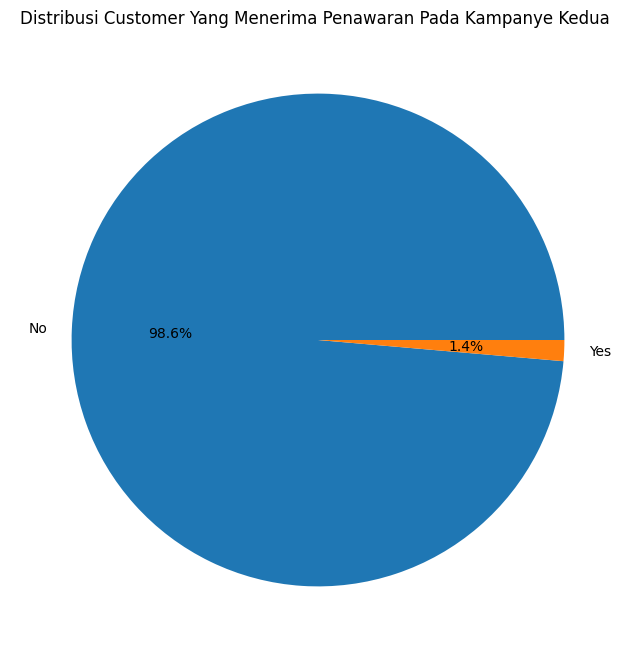

In [263]:
plt.figure(figsize=(8, 8))
plt.pie(AcceptedCmp2Prop, labels=AcceptedCmp2Prop.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Kampanye Kedua ')
plt.show()

In [264]:
conditions = [
    (spclean['AcceptedCmp3'] == 0),
    (spclean['AcceptedCmp3'] == 1)
]

labels = ['No', 'Yes']

spclean['AcceptedCmp3Group'] = np.select(conditions, labels, default='Unknown')
spclean


,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,AcceptedCmp2,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group,AcceptedCmp2Group,AcceptedCmp3Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,No,0,3,11,1,High Freq Visit,No,No,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,No,0,3,11,0,High Freq Visit,No,No,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,No,0,3,11,0,Low Freq Visit,No,No,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,No,0,3,11,0,High Freq Visit,No,No,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,No,0,3,11,0,High Freq Visit,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,No,0,3,11,0,High Freq Visit,No,No,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,No,0,3,11,0,High Freq Visit,Yes,No,No
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,0,No,0,3,11,0,High Freq Visit,No,No,No
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,No,0,3,11,0,Low Freq Visit,No,No,No


In [265]:
AcceptedCmp3Prop = spclean['AcceptedCmp3Group'].value_counts()
AcceptedCmp3Prop

No     2026
Yes     161
Name: AcceptedCmp3Group, dtype: int64

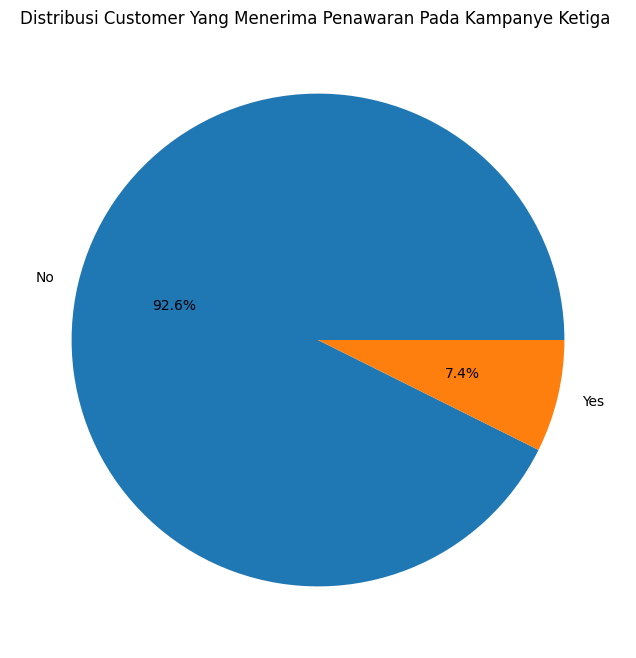

In [266]:
plt.figure(figsize=(8, 8))
plt.pie(AcceptedCmp3Prop, labels=AcceptedCmp3Prop.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Kampanye Ketiga ')
plt.show()

In [267]:
conditions = [
    (spclean['AcceptedCmp4'] == 0),
    (spclean['AcceptedCmp4'] == 1)
]

labels = ['No', 'Yes']

spclean['AcceptedCmp4Group'] = np.select(conditions, labels, default='Unknown')
spclean


,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,ComplainNoYes,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group,AcceptedCmp2Group,AcceptedCmp3Group,AcceptedCmp4Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,No,0,3,11,1,High Freq Visit,No,No,No,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,No,0,3,11,0,High Freq Visit,No,No,No,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,No,0,3,11,0,Low Freq Visit,No,No,No,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,No,0,3,11,0,High Freq Visit,No,No,No,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,No,0,3,11,0,High Freq Visit,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,No,0,3,11,0,High Freq Visit,No,No,No,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,No,0,3,11,0,High Freq Visit,Yes,No,No,No
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,No,0,3,11,0,High Freq Visit,No,No,No,Yes
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,No,0,3,11,0,Low Freq Visit,No,No,No,No


In [268]:
AcceptedCmp4Prop = spclean['AcceptedCmp4Group'].value_counts()
AcceptedCmp4Prop

No     2023
Yes     164
Name: AcceptedCmp4Group, dtype: int64

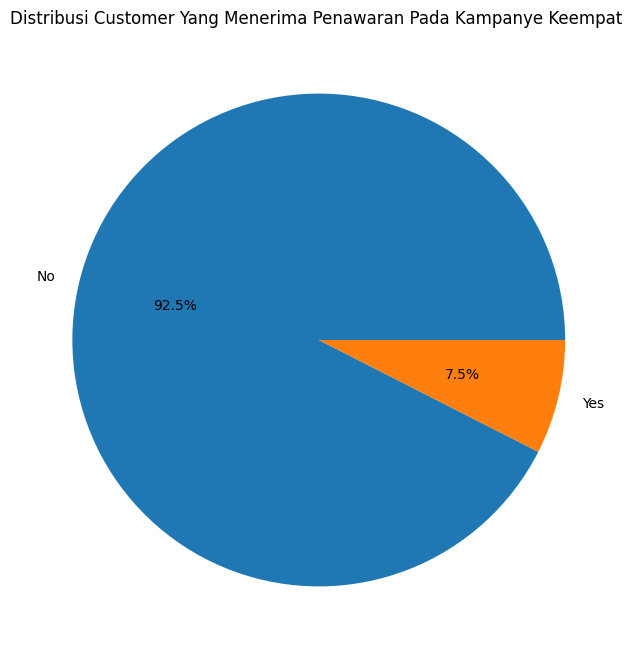

In [269]:
plt.figure(figsize=(8, 8))
plt.pie(AcceptedCmp4Prop, labels=AcceptedCmp4Prop.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Kampanye Keempat ')
plt.show()

In [270]:
conditions = [
    (spclean['AcceptedCmp5'] == 0),
    (spclean['AcceptedCmp5'] == 1)
]

labels = ['No', 'Yes']

spclean['AcceptedCmp5Group'] = np.select(conditions, labels, default='Unknown')
spclean


,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group,AcceptedCmp2Group,AcceptedCmp3Group,AcceptedCmp4Group,AcceptedCmp5Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,3,11,1,High Freq Visit,No,No,No,No,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,3,11,0,High Freq Visit,No,No,No,No,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,3,11,0,Low Freq Visit,No,No,No,No,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,3,11,0,High Freq Visit,No,No,No,No,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,3,11,0,High Freq Visit,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,3,11,0,High Freq Visit,No,No,No,No,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,3,11,0,High Freq Visit,Yes,No,No,No,No
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,0,3,11,0,High Freq Visit,No,No,No,Yes,No
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,3,11,0,Low Freq Visit,No,No,No,No,No


In [271]:
AcceptedCmp5Prop = spclean['AcceptedCmp5Group'].value_counts()
AcceptedCmp5Prop

No     2025
Yes     162
Name: AcceptedCmp5Group, dtype: int64

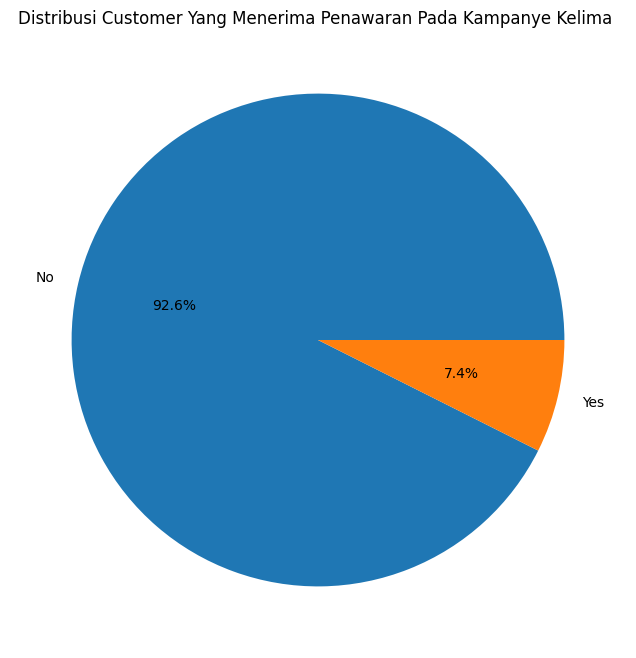

In [272]:
plt.figure(figsize=(8, 8))
plt.pie(AcceptedCmp5Prop, labels=AcceptedCmp5Prop.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Kampanye Kelima ')
plt.show()

In [273]:
x=['Kampanye Marketing 1', 'Kampanye Marketing 2', 'Kampanye Marketing 3', 'Kampanye Marketing 4', 'Kampanye Marketing 5']
y = [AcceptedCmp1Prop['Yes'], AcceptedCmp2Prop['Yes'], AcceptedCmp3Prop['Yes'], AcceptedCmp4Prop['Yes'], AcceptedCmp5Prop['Yes']]

mySeries = pd.Series(y, index=x)
mySeries


Kampanye Marketing 1    142
Kampanye Marketing 2     30
Kampanye Marketing 3    161
Kampanye Marketing 4    164
Kampanye Marketing 5    162
dtype: int64

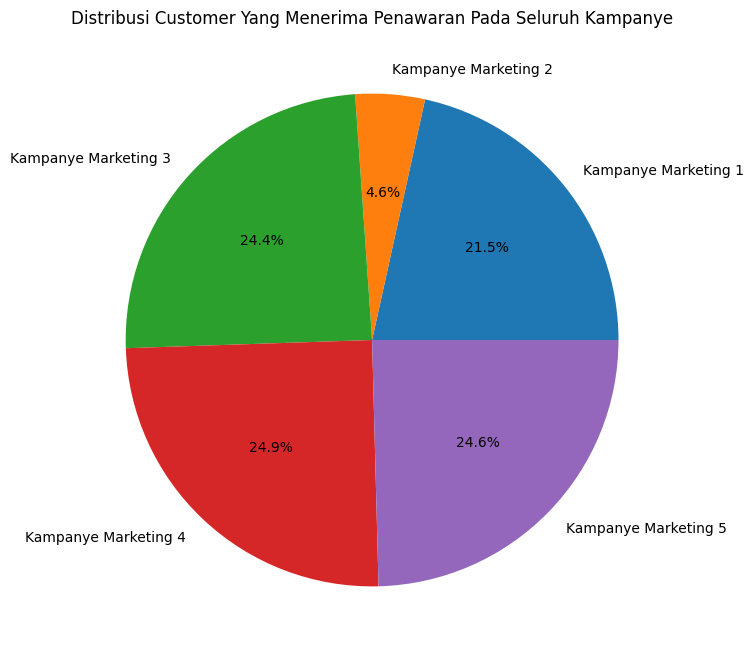

In [274]:
plt.figure(figsize=(8, 8))
plt.pie(mySeries, labels=mySeries.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribusi Customer Yang Menerima Penawaran Pada Seluruh Kampanye')
plt.show()

In [275]:
cmpg = pd.DataFrame({
    'Kampanye': ['1st Cmpg', '2nd Cmpg', '3rd Cmpg', '4th Cmpg', '5th Cmpg'],
    'Nilai': [AcceptedCmp1Prop['Yes'], AcceptedCmp2Prop['Yes'], AcceptedCmp3Prop['Yes'], AcceptedCmp4Prop['Yes'], AcceptedCmp5Prop['Yes']]
})

cmpg['Percentage'] = cmpg['Nilai'] / sum(cmpg['Nilai'])*100
cmpg['Kampanye No'] = cmpg['Kampanye'].index+1
cmpg


,Kampanye,Nilai,Percentage,Kampanye No
0,1st Cmpg,142,21.547800,1
1,2nd Cmpg,30,4.552352,2
2,3rd Cmpg,161,24.430956,3
3,4th Cmpg,164,24.886191,4
4,5th Cmpg,162,24.582701,5


Text(0, 0.5, 'Percentage (%)')

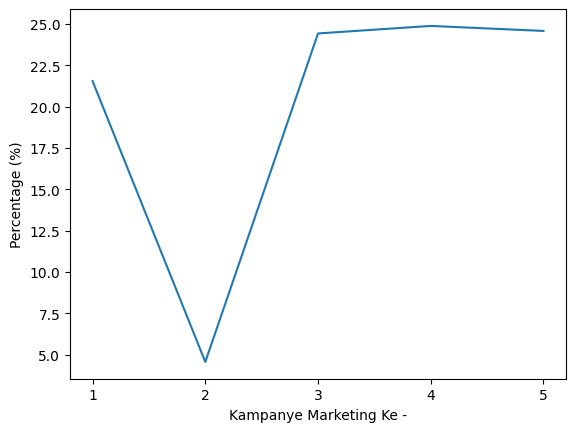

In [276]:
sns.lineplot(x=cmpg['Kampanye No'], y=cmpg['Percentage'])
plt.xlabel('Kampanye Marketing Ke -') 

plt.xticks([1,2,3,4,5])

plt.ylabel('Percentage (%)')

In [277]:
spclean

,ID,Year_Birth,Age,AgeGroup,Education,Marital_Status,Income,IncomeGroup,Kidhome,Teenhome,...,Complain,Z_CostContact,Z_Revenue,Response,WebVisitGroup,AcceptedCmp1Group,AcceptedCmp2Group,AcceptedCmp3Group,AcceptedCmp4Group,AcceptedCmp5Group
0,5524,1957,57,55-64 y.o.,Graduation,Single,58138.0,Middle Class,0,0,...,0,3,11,1,High Freq Visit,No,No,No,No,No
1,2174,1954,60,55-64 y.o.,Graduation,Single,46344.0,Middle Class,1,1,...,0,3,11,0,High Freq Visit,No,No,No,No,No
2,4141,1965,49,45-54 y.o.,Graduation,Together,71613.0,Middle Class,0,0,...,0,3,11,0,Low Freq Visit,No,No,No,No,No
3,6182,1984,30,25-34 y.o.,Graduation,Together,26646.0,Middle Class,1,0,...,0,3,11,0,High Freq Visit,No,No,No,No,No
4,5324,1981,33,25-34 y.o.,PhD,Married,58293.0,Middle Class,1,0,...,0,3,11,0,High Freq Visit,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182,10870,1967,47,45-54 y.o.,Graduation,Married,61223.0,Middle Class,0,1,...,0,3,11,0,High Freq Visit,No,No,No,No,No
2183,4001,1946,68,65+ y.o.,PhD,Together,64014.0,Middle Class,2,1,...,0,3,11,0,High Freq Visit,Yes,No,No,No,No
2184,7270,1981,33,25-34 y.o.,Graduation,Divorced,56981.0,Middle Class,0,0,...,0,3,11,0,High Freq Visit,No,No,No,Yes,No
2185,8235,1956,58,55-64 y.o.,Master,Together,69245.0,Middle Class,0,1,...,0,3,11,0,Low Freq Visit,No,No,No,No,No
